In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import random

google = 'googleplaystore.csv'
Google = pd.read_csv(google)
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [5]:
apple = 'AppleStore.csv'
Apple = pd.read_csv(apple)
Apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [7]:
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [8]:
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


In [9]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [10]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [26]:
Google['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [12]:
Google[Google['Price'] == 'Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [13]:
Google = Google[Google['Price'] != 'Everyone']
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [14]:
nosymb = Google['Price'].str.replace('$','')
Google['Price'] = pd.to_numeric(nosymb)

In [15]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

In [16]:
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [17]:
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

In [18]:
Apple['Platform'] = 'apple'
Google['Platform'] = 'google'

In [19]:
old_names = Apple.columns
new_names = Google.columns
Apple = Apple.rename(columns = dict(zip(old_names, new_names)))

In [27]:
df = pd.concat([Google, Apple],ignore_index= True)
df.sample(12)

,Category,Rating,Reviews,Price,Platform
12494,Social Networking,4.5,196,2.99,apple
6976,FAMILY,4.2,41693,0.00,google
14138,Games,0.0,0,0.00,apple
16613,Games,0.0,0,0.00,apple
6325,FAMILY,NaN,1,0.00,google
6625,HEALTH_AND_FITNESS,3.4,2256,0.00,google
1028,EVENTS,5.0,4,0.00,google
13090,Games,0.0,0,0.00,apple
7505,PERSONALIZATION,NaN,1,0.00,google
16014,Games,4.5,184,6.99,apple


In [48]:
print(df.shape)
df = df.dropna()
print(df.shape)

(16563, 5)
(16563, 5)


In [41]:
df[df['Reviews'] == 0].count()

Category    15634
Rating      15634
Reviews     15634
Price       15634
platform    15634
dtype: int64

In [42]:
df = df[df['Reviews'] != 0]

In [55]:
df.groupby(by='Platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
apple,7197.0,3.526956,1.517948,0.0,3.5,4.0,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


array([[<Axes: title={'center': 'Price'}, xlabel='[Platform]'>,
        <Axes: title={'center': 'Rating'}, xlabel='[Platform]'>],
       [<Axes: title={'center': 'Reviews'}, xlabel='[Platform]'>,
        <Axes: >]], dtype=object)

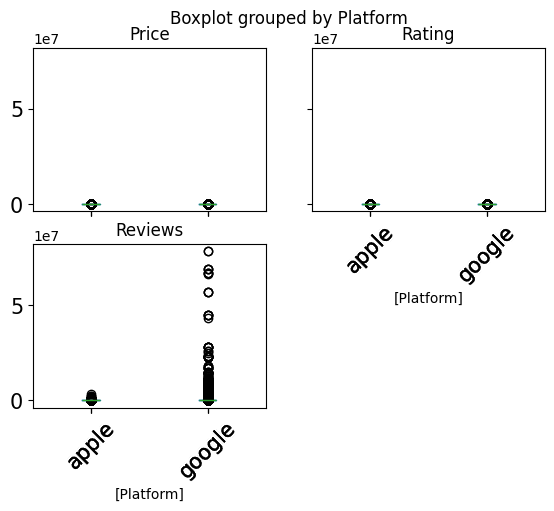

In [56]:
df.boxplot(by='Platform', grid = False, rot = 45, fontsize = 15)

In [80]:
apple = df[df['Platform'] == 'apple']['Rating']
google = df[df['Platform'] == 'apple']['Rating']

In [79]:
apple_normal = stats.normaltest(apple)
print(apple_normal)

google_normal = stats.normaltest(apple)
print(google_normal)

NormaltestResult(statistic=np.float64(1671.3755748541048), pvalue=np.float64(0.0))
NormaltestResult(statistic=np.float64(1671.3755748541048), pvalue=np.float64(0.0))


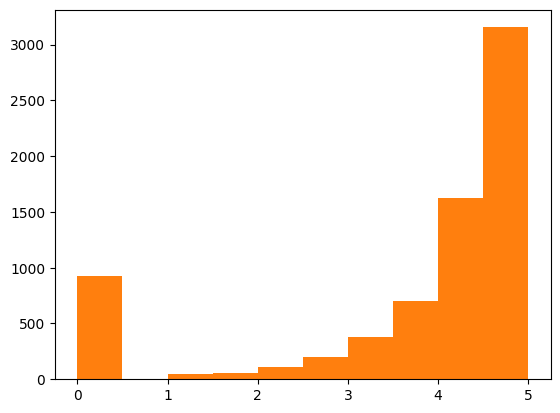

In [59]:
histApple = plt.hist(apple)
histGoogle = plt.hist(google)

In [63]:
df['Permutation1'] = np.random.permutation(df['Rating'])
df.groupby(by='Platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
apple,6604.0,3.903225,1.114843,0.0,3.9,4.2,4.5,5.0
google,9959.0,3.902661,1.127478,0.0,3.9,4.3,4.5,5.0


In [64]:
df.groupby(by='Platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform,,,,,,,,
apple,7197.0,3.526956,1.517948,0.0,3.5,4.0,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [54]:
difference = []
for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    a_mean = np.mean(permutation[df['Platform'] == 'apple'])
    g_mean = np.mean(permutation[df['Platform'] == 'google'])
    difference.append(a_mean - g_mean)

dif = pd.DataFrame(difference, columns =  ['Difference']).dropna()

In [55]:
dif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Difference  10000 non-null  float64
dtypes: float64(1)
memory usage: 78.3 KB


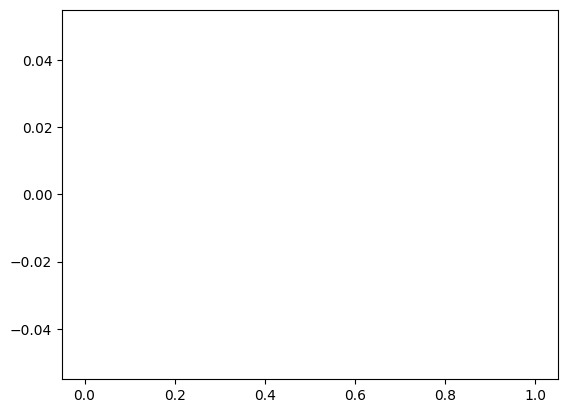

In [44]:
histo = plt.hist(dif, bins = 30)

In [72]:
obs_difference = np.mean(df['Platform'] == 'apple') - np.mean(df['Platform'] == 'google')
obs_difference = abs(obs_difference)
obs_difference

np.float64(0.13095453722151779)